### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [161]:
#load the csv file
data = pd.read_csv('downloads/coupons.csv')

In [162]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [163]:
#understanding the missing value columns; car column has most amount of missing values
data.info()
data.isnull().sum()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [96]:
#drop car column due to 99% missing data and any values with missing data
data = data.drop(columns=['car'])
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon?



In [164]:
#Deriving the mean for acceptance as the acceptance column is 1 or 0
coupon_accept = data.Y.mean()
print(f"Proportion of customers accepted coupon {coupon_accept:.2f}")

Proportion of customers accepted coupon 0.57


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Distribution of Coupon')

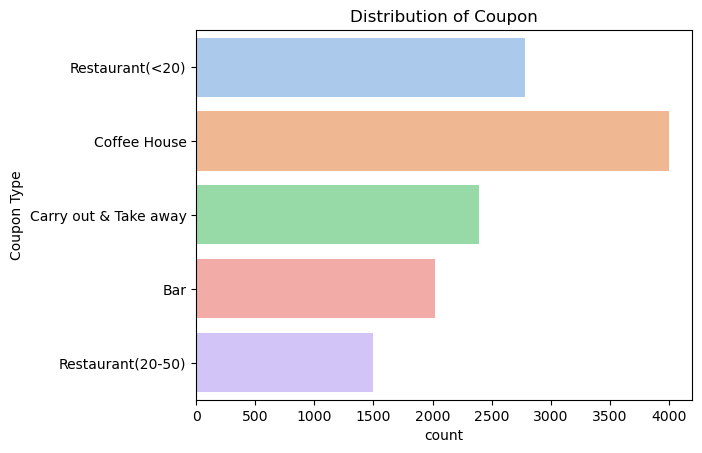

In [165]:
# Utilizing barplot to visualize the coupon column; coffee house has the most amount of coupons
sns.countplot(y='coupon', data=data, hue='coupon', palette='pastel', legend=False)
plt.ylabel('Coupon Type')
plt.title('Distribution of Coupon')

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Count')

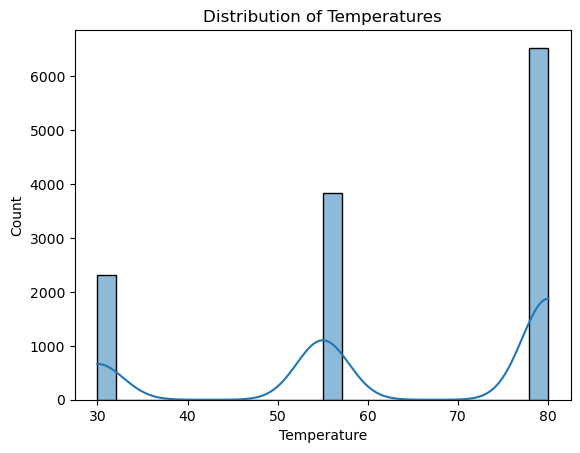

In [166]:
sns.histplot(data=data, x='temperature', kde=True)
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Count')

In [ ]:
#Based on the initial analysis, Coffee House coupons appear to be the most prevalent type, 
#followed by coupons delivered when the temperature is 80 
#Further analysis will focus on identifying the specific criteria 
#that can be utilized to target the highest volume of receptive customers.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [167]:
#Filtering on only Bar coupons
data_bar = data[data['coupon'] == 'Bar']
data_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [168]:
#Deriving the mean for acceptance as the acceptance column is 1 or 0
coupon_accept_1 = data_bar.Y.mean()
print(f"Proportion of customers accepted coupon {coupon_accept_1:.2f}")

Proportion of customers accepted coupon 0.41


In [169]:
data_bar.groupby("Bar").Y.mean()

Bar
1~3      0.647355
4~8      0.780000
gt8      0.734694
less1    0.443860
never    0.187952
Name: Y, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


C:\Users\vs100\AppData\Local\Temp\ipykernel_17992\748437501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar['Bar_Group'] = np.where(data_bar['Bar'].isin(data_bar_less_than_3), '<3 times/month', '>3 times/month')


Text(0, 0.5, 'Acceptance Rate%')

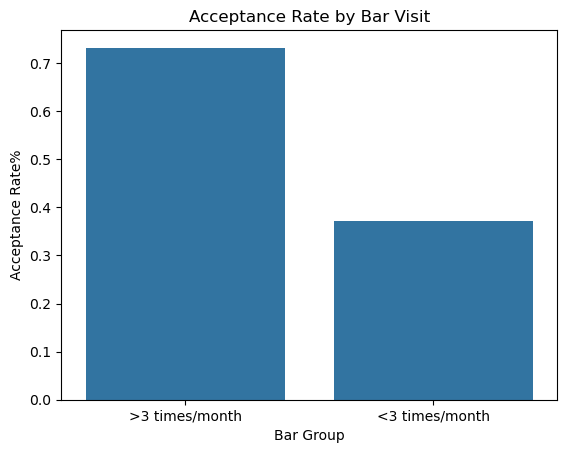

In [170]:
#comparing the acceptance rate of those who went fewer times to bar vs those who went more than 3 time,Number of times 
#that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
#data_bar.groupby("Bar").Y.mean()
data_bar_less_than_3 = ['less1','1~3','never']
data_bar_greater_than_3 = ['4~8','gt8']
data_bar['Bar_Group'] = np.where(data_bar['Bar'].isin(data_bar_less_than_3), '<3 times/month', '>3 times/month')

bar_group_criteria = data_bar.groupby('Bar_Group')['Y'].mean().sort_values(ascending=False)
bar_group_criteria

sns.barplot(x=bar_group_criteria.index, y=bar_group_criteria.values)
plt.title('Acceptance Rate by Bar Visit')
plt.xlabel('Bar Group')
plt.ylabel('Acceptance Rate%')









4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [171]:
data_bar_more_than_1 = ['1~3','4~8','gt8']
data_bar_greater_25 = ['26','31','36','41','46','50plus']

# filter the criteria
Bar_Group_two_criteria_filter = (data_bar['Bar'].isin(data_bar_more_than_1)) & \
               (data_bar['age'].isin(data_bar_greater_25))

# Calculate means for acceptance rates for the above question
Bar_Group_two_criteria_filter_Y = data_bar[Bar_Group_two_criteria_filter]['Y'].mean()
Bar_Group_two_criteria_filter_N = data_bar[~Bar_Group_two_criteria_filter]['Y'].mean()
print("Acceptance rate of customers go to bar >1 and age >25")
print(f"Proportion of customers accepted coupon {Bar_Group_two_criteria_filter_Y:.2f}", f"Proportion of customers did not accept coupon{Bar_Group_two_criteria_filter_N:.2f}")

Acceptance rate of customers go to bar >1 and age >25
Proportion of customers accepted coupon 0.70 Proportion of customers did not accept coupon0.34


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [172]:
no_kid_passenger = ['Alone', 'Friend(s)', 'Partner']
occupation_excluded = ['Farming, Fishing, or Forestry']
#data_bar_more_than_1 use for customers who go to bar more than once

# filter the criteria
bar_data_pas_occ_more_1 = (data_bar['Bar'].isin(data_bar_more_than_1)) & \
                (data_bar['passanger'].isin(no_kid_passenger)) & \
                (~data_bar['occupation'].isin(occupation_excluded))

# Calculate acceptance rates
Bar_Group_three_criteria_filter_Y = data_bar[bar_data_pas_occ_more_1]['Y'].mean()
Bar_Group_three_criteria_filter_N = data_bar[~bar_data_pas_occ_more_1]['Y'].mean()
Bar_Group_three_criteria_filter_Y, Bar_Group_three_criteria_filter_N
print("Acceptance rate of customers go to bar >1 and have no kids and not in Farming, Fishing or Forestry")
print(f"Proportion of customers accepted coupon {Bar_Group_three_criteria_filter_Y:.2f}", f"Proportion of customers accepted coupon{Bar_Group_three_criteria_filter_N:.2f}")

Acceptance rate of customers go to bar >1 and have no kids and not in Farming, Fishing or Forestry
Proportion of customers accepted coupon 0.71 Proportion of customers accepted coupon0.30


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [175]:
#data_bar_more_than_1
#no_kid_passenger
data_bar_widowed = ['Widowed']


Bar_Group_two_criteria_filter_1 = bar_data_pas_occ_more_1 = (data_bar['Bar'].isin(data_bar_more_than_1)) & \
                (data_bar['passanger'].isin(no_kid_passenger)) & \
                (~data_bar['maritalStatus'].isin(data_bar_widowed))

#Bar_Group_two_criteria_filter

Bar_Group_two_criteria_filter_1_Y = data_bar[Bar_Group_two_criteria_filter_1]['Y'].mean()
Bar_Group_two_criteria_filter_1_N = data_bar[~Bar_Group_two_criteria_filter_1]['Y'].mean()
Bar_Group_two_criteria_filter_1_Y, Bar_Group_two_criteria_filter_1_N
print("Acceptance rate of customers go to bar >1 and have no kids and not widowed")
print(f"Proportion of customers accepted coupon {Bar_Group_two_criteria_filter_1_Y:.2f}", f"Proportion of customers accepted coupon{Bar_Group_two_criteria_filter_1_N:.2f}")


Acceptance rate of customers go to bar >1 and have no kids and not widowed
Proportion of customers accepted coupon 0.71 Proportion of customers accepted coupon0.30


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [174]:
#Frequent visitors acceptance rate vs not so frequent: While the overall acceptance mean for 
#Bar coupons is about 41%, 
#the acceptance rate for the most frequent visitors (>3 times a month) is significantly higher, 
#at approximately 77%. 

#Key Targeting Criteria: The highest probability of acceptance based on the above analysis
#Age: Customers who are over 25.
#Frequency: Those who frequent the bar (more than once a month).
#Demographic: Those driving with non-child passengers (or alone) or not widowed

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [176]:
data_carryout = data[data['coupon'] == 'Carry out & Take away']
data_carryout.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
19,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0


In [177]:
# Calculate overall acceptance rate
acceptance_rate = data_carryout['Y'].mean()  
print(f"Overall acceptance rate for carryout: {acceptance_rate:.2%}")

Overall acceptance rate for carryout: 73.55%


Text(0, 0.5, 'Acceptance Rate')

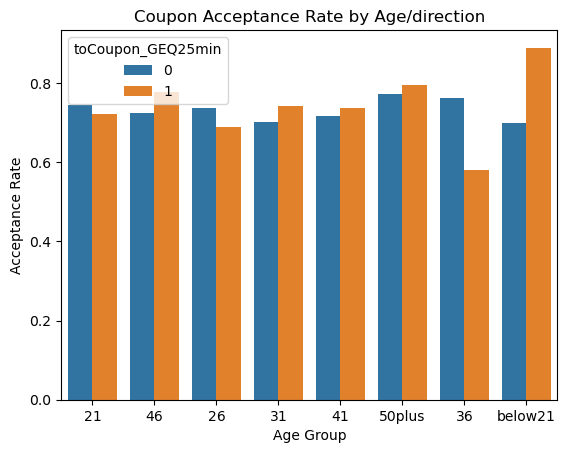

In [178]:
#Acceptance by age
sns.barplot(x='age', y='Y', data=data_carryout,hue = 'toCoupon_GEQ25min',errorbar = None)
plt.title('Coupon Acceptance Rate by Age/direction')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')

Text(0.5, 1.0, 'Correlation Matrix Carryaway Coupon Data')

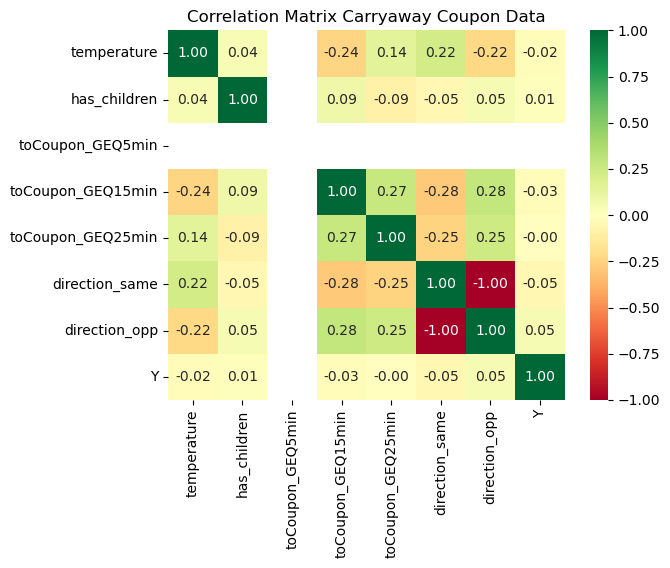

In [179]:

# Create a heatmap to understand the correlation
sns.heatmap(data_carryout.corr(numeric_only=True), cmap="RdYlGn", annot=True,fmt=".2f")
plt.title('Correlation Matrix Carryaway Coupon Data')

Text(0, 0.5, 'Acceptance Rate')

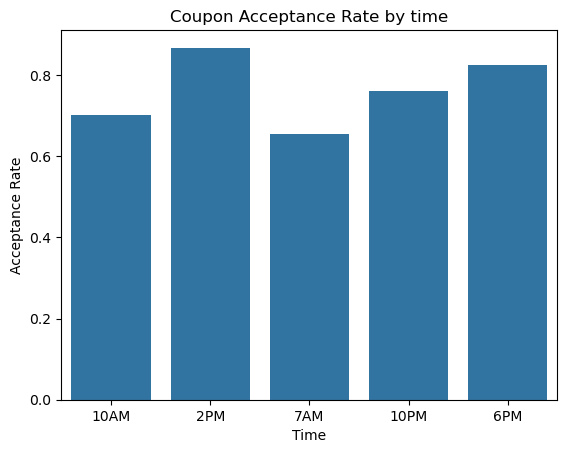

In [180]:
#Acceptance by time
sns.barplot(x='time', y='Y', data=data_carryout, errorbar = None)
plt.title('Coupon Acceptance Rate by time')
plt.xlabel('Time')
plt.ylabel('Acceptance Rate')

Text(0, 0.5, 'Acceptance Rate')

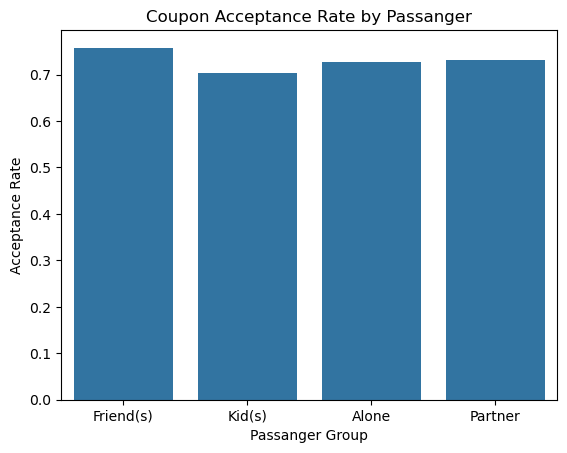

In [181]:
#Acceptance by Passanger
sns.barplot(x='passanger', y='Y', data=data_carryout, errorbar = None)
plt.title('Coupon Acceptance Rate by Passanger')
plt.xlabel('Passanger Group')
plt.ylabel('Acceptance Rate')

Text(0, 0.5, 'Acceptance Rate')

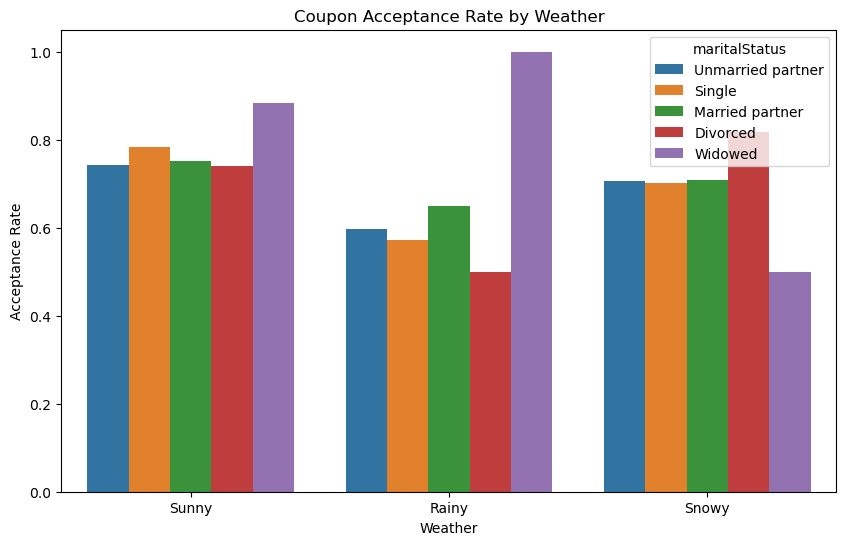

In [182]:
#Acceptance by Weather
plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='Y',hue='maritalStatus', data=data_carryout,errorbar = None)
plt.title('Coupon Acceptance Rate by Weather')
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')

Text(0, 0.5, 'Acceptance Rate')

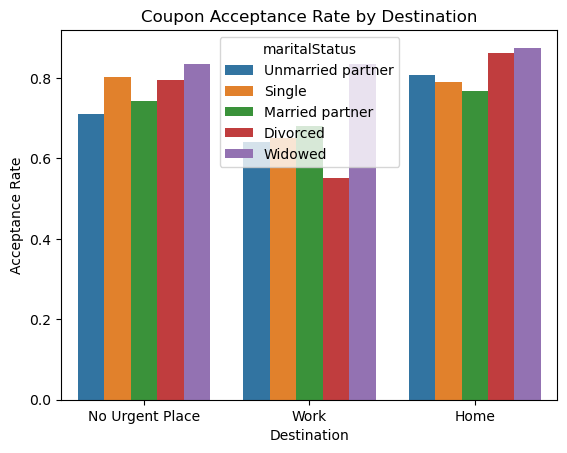

In [183]:
#Acceptance by Destination
sns.barplot(x='destination', y='Y', data=data_carryout,hue = 'maritalStatus',errorbar = None)
plt.title('Coupon Acceptance Rate by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')

C:\Users\vs100\AppData\Local\Temp\ipykernel_17992\2811952770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_carryout['CA_Group'] = np.where(


Text(0, 0.5, 'Acceptance Rate%')

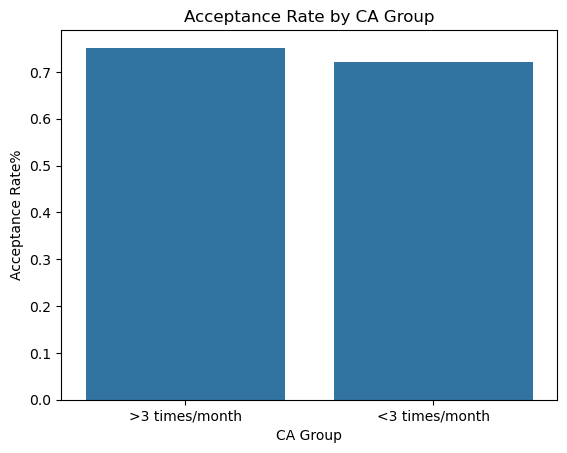

In [184]:
#Acceptance Criteria with less than 1 and greater than 1 Carryaway
data_CA_less_than_3 = ['less1','1~3','never']
data_CA_greater_than_3 = ['4~8','gt8']
data_carryout['CA_Group'] = np.where(
    data_carryout['CarryAway'].isin(data_CA_less_than_3), 
    '<3 times/month', 
    '>3 times/month'
)

CA_group_criteria = data_carryout.groupby('CA_Group')['Y'].mean().sort_values(ascending=False)
CA_group_criteria

sns.barplot(x=CA_group_criteria.index, y=CA_group_criteria.values)
plt.title('Acceptance Rate by CA Group')
plt.xlabel('CA Group')
plt.ylabel('Acceptance Rate%')

In [185]:
#Acceptance rate by customers who had > 1carryaway and whose marrital status was widowed as in the 
#first few corelations, I observed that widowed customers had more takeaways

data_CA_more_than_1 = ['1~3','4~8','gt8']
data_CA_marital_status = ['Widowed']


CA_Group_two_criteria_filter = (data_carryout['CarryAway'].isin(data_CA_more_than_1)) & \
               (data_carryout['maritalStatus'].isin(data_CA_marital_status))

#CA_Group_two_criteria_filter_Y

CA_Group_two_criteria_filter_Y = data_carryout[CA_Group_two_criteria_filter]['Y'].mean()
CA_Group_two_criteria_filter_N = data_carryout[~CA_Group_two_criteria_filter]['Y'].mean()
CA_Group_two_criteria_filter_Y,CA_Group_two_criteria_filter_N
print("Acceptance rate of customers frequency > 1 and are widowed")
print(f"Proportion of customers accepted coupon {CA_Group_two_criteria_filter_Y:.2f}", f"Proportion of customers accepted coupon{CA_Group_two_criteria_filter_N:.2f}")

Acceptance rate of customers frequency > 1 and are widowed
Proportion of customers accepted coupon 0.87 Proportion of customers accepted coupon0.73


In [186]:
#Weather, maritalsttaus, destination, age
#Acceptance rate by customers who had > 3carryaway and whose marrital status was widowed as in the 
#first few corelations, I observed that widowed customers had more takeaways on Sunny and rainy days

data_CA_more_than_3 = ['4~8','gt8']
data_CA_marital_status = ['Widowed']
data_CA_weather = ['Sunny','Rainy Weather']


CA_Group_three_criteria_filter = (data_carryout['CarryAway'].isin(data_CA_more_than_1)) & \
               (data_carryout['maritalStatus'].isin(data_CA_marital_status))&\
                (data_carryout['weather'].isin(data_CA_weather))

#CA_Group_three_criteria_filter

CA_Group_three_criteria_filter_Y = data_carryout[CA_Group_three_criteria_filter]['Y'].mean()
CA_Group_three_criteria_filter_N = data_carryout[~CA_Group_three_criteria_filter]['Y'].mean()
CA_Group_three_criteria_filter_Y,CA_Group_three_criteria_filter_N
print("This for the proportion of customers who are Widowed, who did carryaway more than 3 on Sunny and Rainy weather")
print(f"Proportion of customers accepted coupon {CA_Group_three_criteria_filter_Y:.2f}",f"Proportion of customers accepted coupon{CA_Group_three_criteria_filter_N:.2f}")


This for the proportion of customers who are Widowed, who did carryaway more than 3 on Sunny and Rainy weather
Proportion of customers accepted coupon 0.93 Proportion of customers accepted coupon0.73


In [ ]:
#I selected the 'Carryaway' coupon for my independent investigation. 
#First, I filtered the data on the 'Carryaway' coupon and prepared a DataFrame 
#exclusive to this type. The overall acceptance rate for Carryaway is high, at approximately 74%.

#After calculating the mean, I examined the correlation matrix to see which 
#numerical fields had the highest correlation. I did not find a definite conclusion there, 
#so I manually looked at a couple of attributes and compared them to the customers who accepted 
#the coupon.

#Despite the frequency of visits not being a big differentiator on its own, 
#the combination of 'widowed customers' with attributes related to 
#'weather' and 'frequency of visits' showed a strong correlation of 0.90.


#Key Targeting Criteria: The highest probability of acceptance based on the above analysis
#Frequency: Those who frequent the bar (more than 3 times).
#Demographic: widowed
#Weather: Sunny/Rainy

